In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Data Wrangling and Cleaning

In [2]:
nba = pd.read_csv('Seasons_Stats.csv', index_col=0)

In [3]:
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
Year      24624 non-null float64
Player    24624 non-null object
Pos       24624 non-null object
Age       24616 non-null float64
Tm        24624 non-null object
G         24624 non-null float64
GS        18233 non-null float64
MP        24138 non-null float64
PER       24101 non-null float64
TS%       24538 non-null float64
3PAr      18839 non-null float64
FTr       24525 non-null float64
ORB%      20792 non-null float64
DRB%      20792 non-null float64
TRB%      21571 non-null float64
AST%      22555 non-null float64
STL%      20792 non-null float64
BLK%      20792 non-null float64
TOV%      19582 non-null float64
USG%      19640 non-null float64
blanl     0 non-null float64
OWS       24585 non-null float64
DWS       24585 non-null float64
WS        24585 non-null float64
WS/48     24101 non-null float64
blank2    0 non-null float64
OBPM      20797 non-null float64
DBPM      2

In [5]:
# I can drop two blank columns that have no information
nba = nba.drop(columns=['blanl', 'blank2'])

To make sure that I am working with complete data and to remove all data prior to the modern era that generally began in the 1980's, I will drop all columns that have missing data. Many of the more sophisticated statistics were not tracked in the early decades of the leage.

In [6]:
nba = nba.dropna(axis=0, how='any')
nba = nba.reset_index(drop=True)
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 50 columns):
Year      14585 non-null float64
Player    14585 non-null object
Pos       14585 non-null object
Age       14585 non-null float64
Tm        14585 non-null object
G         14585 non-null float64
GS        14585 non-null float64
MP        14585 non-null float64
PER       14585 non-null float64
TS%       14585 non-null float64
3PAr      14585 non-null float64
FTr       14585 non-null float64
ORB%      14585 non-null float64
DRB%      14585 non-null float64
TRB%      14585 non-null float64
AST%      14585 non-null float64
STL%      14585 non-null float64
BLK%      14585 non-null float64
TOV%      14585 non-null float64
USG%      14585 non-null float64
OWS       14585 non-null float64
DWS       14585 non-null float64
WS        14585 non-null float64
WS/48     14585 non-null float64
OBPM      14585 non-null float64
DBPM      14585 non-null float64
BPM       14585 non-null float64
VOR

In [7]:
nba.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
1,1980.0,Larry Bird*,PF,23.0,BOS,82.0,82.0,2955.0,20.5,0.538,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0
2,1980.0,M.L. Carr,SF,29.0,BOS,82.0,7.0,1994.0,14.6,0.526,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0
3,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0
4,1980.0,Dave Cowens*,C,31.0,BOS,66.0,55.0,2159.0,14.8,0.477,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0
5,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,0.754,77.0,104.0,181.0,215.0,111.0,27.0,105.0,178.0,816.0
6,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,0.690,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0
7,1980.0,Jeff Judkins,SF,23.0,BOS,65.0,0.0,674.0,14.1,0.567,...,0.816,32.0,34.0,66.0,47.0,29.0,5.0,49.0,91.0,351.0
8,1980.0,Pete Maravich*,SG,32.0,TOT,43.0,4.0,964.0,13.8,0.500,...,0.867,17.0,61.0,78.0,83.0,24.0,6.0,82.0,79.0,589.0
9,1980.0,Pete Maravich*,SG,32.0,BOS,26.0,4.0,442.0,15.6,0.547,...,0.909,10.0,28.0,38.0,29.0,9.0,2.0,37.0,49.0,299.0


In [8]:
# There are also random asterisks in some of the names that I need to clean out
nba['Player'] = nba['Player'].map(lambda x: x.replace('*', ''))

In [9]:
nba.Year.describe()

count    14585.000000
mean      2001.217552
std         10.228267
min       1980.000000
25%       1993.000000
50%       2002.000000
75%       2010.000000
max       2017.000000
Name: Year, dtype: float64

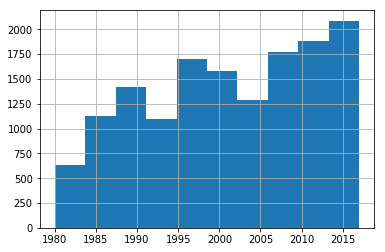

In [10]:
nba.Year.hist()

In [11]:
nba['Returned'] = np.nan

for i, player in enumerate(nba['Player']):
    next_year = int(nba.loc[i, 'Year']) + 1
    if ((nba['Player'] == player) & (nba['Year'] == next_year)).any() == True:
        nba.loc[i, 'Returned'] = 1
    else:
        nba.loc[i, 'Returned'] = 0

I now need to drop all of the data that is from the year 2017, as that data is now all coded 0 for not returned since that is the last year in the data. This would significantly skew the data if I left it in.

In [12]:
nba = nba.drop(index=nba[nba['Year'] == 2017].index)

nba = nba.reset_index(drop=True)

In [13]:
nba.Returned.value_counts()

1.0    10749
0.0     3305
Name: Returned, dtype: int64

In [14]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14054 entries, 0 to 14053
Data columns (total 51 columns):
Year        14054 non-null float64
Player      14054 non-null object
Pos         14054 non-null object
Age         14054 non-null float64
Tm          14054 non-null object
G           14054 non-null float64
GS          14054 non-null float64
MP          14054 non-null float64
PER         14054 non-null float64
TS%         14054 non-null float64
3PAr        14054 non-null float64
FTr         14054 non-null float64
ORB%        14054 non-null float64
DRB%        14054 non-null float64
TRB%        14054 non-null float64
AST%        14054 non-null float64
STL%        14054 non-null float64
BLK%        14054 non-null float64
TOV%        14054 non-null float64
USG%        14054 non-null float64
OWS         14054 non-null float64
DWS         14054 non-null float64
WS          14054 non-null float64
WS/48       14054 non-null float64
OBPM        14054 non-null float64
DBPM        14054 n

In [15]:
nba.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Returned
0,1980.0,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,1.0
1,1980.0,Larry Bird,PF,23.0,BOS,82.0,82.0,2955.0,20.5,0.538,...,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0,1.0
2,1980.0,M.L. Carr,SF,29.0,BOS,82.0,7.0,1994.0,14.6,0.526,...,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0,1.0
3,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0,0.0
4,1980.0,Dave Cowens,C,31.0,BOS,66.0,55.0,2159.0,14.8,0.477,...,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0,0.0
5,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,77.0,104.0,181.0,215.0,111.0,27.0,105.0,178.0,816.0,1.0
6,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0,1.0
7,1980.0,Jeff Judkins,SF,23.0,BOS,65.0,0.0,674.0,14.1,0.567,...,32.0,34.0,66.0,47.0,29.0,5.0,49.0,91.0,351.0,0.0
8,1980.0,Pete Maravich,SG,32.0,TOT,43.0,4.0,964.0,13.8,0.500,...,17.0,61.0,78.0,83.0,24.0,6.0,82.0,79.0,589.0,0.0
9,1980.0,Pete Maravich,SG,32.0,BOS,26.0,4.0,442.0,15.6,0.547,...,10.0,28.0,38.0,29.0,9.0,2.0,37.0,49.0,299.0,0.0


I will now also remove the rows where a player split the year between two or more teams. The basketball reference site has an entry for such a player's year totals under the team "TOT". The remaining season splits are not necessarry and would skew the data as it is a subsection of existing data.

In [16]:
for i, player in enumerate(nba['Player']):
    year = nba.loc[i, 'Year']
    # If for any given combination of player and year there is a row where the team is TOT for total,
    # delete the season splits for each team in that year
    if ((nba['Year'] == year) & (nba['Player'] == player) & (nba['Tm'] == 'TOT')).any() == True:
        index = nba[(nba['Year'] == year) & (nba['Player'] == player) & (nba['Tm'] != 'TOT')].index
        nba = nba.drop(index=index)

KeyError: 9